### File Number and PT100 Readings

In [1]:
import numpy as np
import random
import sympy as sp
import csv
from matplotlib import pyplot as plt
from matplotlib import axes
import pandas as pd


In [2]:
#print(np.array(pd.read_table("{}.txt".format(1)))[:200,0]) #file 1, values 1->200 in column 1 (skips first row of vals)

### Getting Average PT100 value for each temp

In [3]:
#theoretical_temps = PT100_vals[1]
array = np.arange(1,22,1)

PT100_inlet = []
PT100_outlet = []

for i in array:
    i = int(i)
    PT_100_i = np.array(pd.read_table("{}.txt".format(i)))[:200,77]
    PT_100_i_avg = np.mean(PT_100_i)
    PT100_inlet.append(PT_100_i_avg)
    PT_100_o = np.array(pd.read_table("{}.txt".format(i)))[:200,78]
    PT_100_o_avg = np.mean(PT_100_o)
    PT100_outlet.append(PT_100_o_avg)

print("PT100 Inlet ave vals:", PT100_inlet)
print("PT100 Outlet ave vals:",PT100_outlet)

PT100 Inlet ave vals: [15.258277514999998, 20.257908110000002, 25.268114519999994, 30.352327295000006, 35.38999830000001, 40.36622991499999, 45.35996548500001, 50.390643925000006, 55.41143235500002, 60.470201620000005, 65.454024945, 60.42397471500001, 55.36422167500001, 50.371282995, 45.362066780000006, 40.37755978999999, 35.346841010000006, 30.296474349999997, 25.279184754999996, 20.262913505, 15.272230349999997]
PT100 Outlet ave vals: [15.350101514999997, 20.311714600000002, 25.304671195, 30.37637734000001, 35.39230135, 40.372119049999995, 45.343399275, 50.35175854999999, 55.35185047, 60.379511865, 65.34356830499999, 60.373603225, 55.340893815, 50.376163835, 45.398018995, 40.416379379999995, 35.401307705, 30.374285960000005, 25.371912279999997, 20.373016995, 15.399237709999996]


In [5]:
PTref = []
for i in np.arange(0,21,1):
    PT100cal = ((PT100_inlet[i]-0.2942543581515781)/0.9908373802343359 + (PT100_outlet[i]-0.5179385816684551)/0.9878359665716272)
    PTave = PT100cal/2
    PTref.append(PTave)
    #print(PT100list)

print("PTref =", np.array(PTref))

PTref = [15.05860211 20.09288882 25.14837707 30.28107031 35.36204296 40.39373638
 45.42994141 50.50355651 55.56799629 60.66555658 65.69310329 60.63923869
 55.53862688 50.50613943 45.45864793 40.42185638 35.3448234  30.25182703
 25.18799791 20.12644329 15.09051366]


### File Num and PT100 Value

In [6]:
import pandas as pd
PT100_ref = np.transpose(np.array(pd.read_excel("FILE.xlsx")))
print(PT100_ref)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.         11.         12.
  13.         14.         15.         16.         17.         18.
  19.         20.         21.        ]
 [15.05860211 20.09288882 25.14837707 30.28107031 35.36204296 40.39373638
  45.42994141 50.50355651 55.56799629 60.66555658 65.69310329 60.63923869
  55.53862688 50.50613943 45.45864793 40.42185638 35.3448234  30.25182703
  25.18799791 20.12644329 15.09051366]]


### TC's 1 to 3

In [7]:
theoretical_temps = PT100_ref[1]
array2 = PT100_ref[0]

TCz = []

for z in range(0,60):
    #i = int(i)
    tc = 0
    TCzcat = []

    for i in array2:
        i = int(i)
        TC_z = np.array(pd.read_table("{}.txt".format(i)))[:200,z] #200 rows, col 1
        TC_z_avg = np.mean(TC_z)
        TCzcat.append(TC_z_avg)
        #print(TCz)
        tc += 1
    TCz.append(TCzcat)

#print(TCz) #list of a list for each TC

In [8]:
TCz[1]

[15.437828285,
 20.32243867,
 25.26070345,
 30.285415065,
 35.27295619,
 40.21067041,
 45.169624105000004,
 50.142304685,
 55.12053425,
 60.110372205,
 65.014693465,
 60.057294569999996,
 55.097866964999994,
 50.161051459999996,
 45.22189313,
 40.285379675,
 35.306766515,
 30.306886594999995,
 25.326733914999995,
 20.354480095,
 15.406658245000001]

In [9]:
factors = []

for d in range(0,60):
    pig = []
    m,c = np.polyfit(theoretical_temps,TCz[d],1)
    pig.append(m)
    pig.append(c)
    factors.append(pig)
print(factors) #list of smaller lists with each tc calibration factors

[[0.9806819286021106, 1.0747387192125433], [0.9803798607625728, 0.6310614269617043], [0.9860574212557878, 0.4195635259394807], [0.9803204602609421, 0.9517972035860391], [0.9860648302704323, 0.48544955198639006], [0.9823094918212006, 0.775812846851633], [0.9859980012431756, 0.5000075186549428], [0.9861096673310226, 0.5361529684687972], [0.9832269977464575, 1.1366400347068746], [0.984767251119804, 0.89339833969928], [0.9861907652262936, 0.8769482148260237], [0.9851769850355675, 1.1557344785024086], [0.9830732971954254, 0.8584983977720079], [0.9830053665751392, 1.100423085629612], [0.987004753635263, 0.5650893474830895], [0.9861168175864721, 0.5558467617770582], [0.9855274400576158, 0.8652853672874216], [0.984235191321454, 0.9782268941562713], [0.9844174485836492, 1.2499646670455924], [0.9852376144851638, 0.8942148688829195], [0.9798661439165357, 1.1312145648842469], [0.03810536450135228, 245.97157841798435], [0.9844285735946523, 1.13312868098484], [0.9812013922593887, 1.0657318618338774]

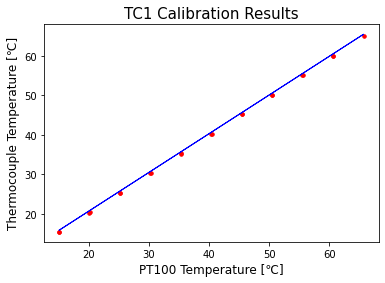

m1 = 0.9806819286021106 ;  c1 = 1.0747387192125433


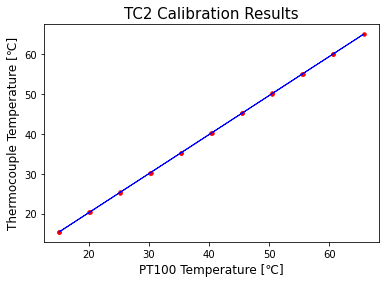

m2 = 0.9803798607625728 ;  c2 = 0.6310614269617043


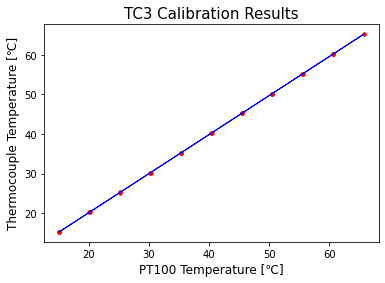

m3 = 0.9860574212557878 ;  c3 = 0.4195635259394807


In [10]:
m_1,c_1 = np.polyfit(theoretical_temps,TCz[0],1) #1st degree ie. straight line
plt.plot(theoretical_temps,(theoretical_temps*m_1)+ c_1,linewidth=1,color="blue")

plt.scatter(theoretical_temps,TCz[1],s=12,c="red")
plt.ylabel("Thermocouple Temperature [\u2103]",fontsize=12)
plt.xlabel("PT100 Temperature [\u2103]",fontsize=12)
plt.title("TC1 Calibration Results",fontsize=15)
plt.show()
print("m1 =",m_1,";  c1 =",c_1)


m_2,c_2= np.polyfit(theoretical_temps,TCz[1],1)
plt.plot(theoretical_temps,(theoretical_temps*m_2)+ c_2,linewidth=1,color="blue")

plt.scatter(theoretical_temps,TCz[1],s=12,c="red")
plt.ylabel("Thermocouple Temperature [\u2103]",fontsize=12)
plt.xlabel("PT100 Temperature [\u2103]",fontsize=12)
plt.title("TC2 Calibration Results",fontsize=15)
plt.show()
print("m2 =",m_2,";  c2 =",c_2)


m_3,c_3 = np.polyfit(theoretical_temps,TCz[2],1)
plt.plot(theoretical_temps,(theoretical_temps*m_3)+ c_3,linewidth=1,color="blue")

plt.scatter(theoretical_temps,TCz[2],s=12,c="red")
plt.ylabel("Thermocouple Temperature [\u2103]",fontsize=12)
plt.xlabel("PT100 Temperature [\u2103]",fontsize=12)
plt.title("TC3 Calibration Results",fontsize=15)
plt.savefig('TC1 eg.svg', format='svg', dpi=1200)
plt.show()
print("m3 =",m_3,";  c3 =",c_3)


### Uncertainty

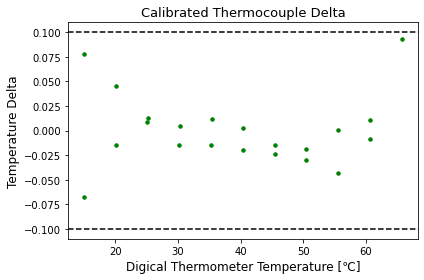

In [13]:
del_T_inlet = np.zeros(len(TCz[0]))
#del_T_outlet = np.zeros(len(TCz[1]))


dog = 3

for i in range(0, len(TCz[1]),1):
    del_T_inlet[i] = theoretical_temps[i] - ((TCz[dog][i] - factors[dog][1])/(factors[dog][0]))
    #del_T_outlet[i] = theoretical_temps[i]-PT100_outlet[i]


plt.scatter(theoretical_temps,del_T_inlet,s=12,c="green")
plt.axhline(y=0.1,xmin=0,xmax=1,linestyle='dashed',c="k")
plt.axhline(y=-0.1,xmin=0,xmax=1,linestyle='dashed',c='k')
plt.xlabel("Digical Thermometer Temperature [\u2103]",fontsize=12)
plt.ylabel("Temperature Delta", fontsize =12)
plt.title('Calibrated Thermocouple Delta',fontsize=13)
plt.tight_layout()
plt.savefig('UNCERTAINTY.svg', format='svg', dpi=1200)
plt.show()